# $$ \mathbb{Semester } \text{  1} $$

In [1]:
from pylab import *
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (15,6)

# $${\textbf{Assignment 1}}$$

$\text{  Q1. Write a function that inputs a list, and a number .} $                                  
$\qquad\text{And returns a new list which contains only interger multiples of the the number.}$

In [2]:
def multiple(listnum,n):
    mul=[num for num in listnum if num % n == 0]
    return mul

a = [7,3,6,5,9,4,5]
b=3
multiple(a,b)

[3, 6, 9]

$\text{Q2. Write a function which inputs two vectors (of arbitrary dimension) and returns their dot product.}$

In [3]:
def dot_product(l1, l2):
    return np.sum([x*y for x,y in zip(l1,l2)])

a=[1, 2, 10]
b=[4, 7, 2]
dot_product(a,b)

38

$\text{ Q3. Write a function which inputs two vectors (3-d) and returns their cross product.}$

In [4]:
def cross_product(u,v):  
    return ([u[1]*v[2]-u[2]*v[1], 
             u[2]*v[0]-u[0]*v[2],
             u[0]*v[1]-u[1]*v[0]])

a=[1, 2, 3]
b=[5, 6, 8]
cross_product(a,b)

[-2, 7, -4]

$\text{ Q4. Write a program which inputs (x,a,b) and calculates confluenet hypergeometric function},F(a, b, x) $                                                                              
$\qquad\text{Make default values of a and b to be 1 and 2.} $

$\text{The confluent hypergeometric function of the 1st kind also known as Kummer’s function and denoted by }M(a,b,z)$

### $$\boxed{\displaystyle{{}^{}{\phantom{1}_1}\text{F}_1(a,b,z)={\sum_{k=0}^\infty} \frac{(a)_k}{(b)_k} \frac{z^k}{k!}}}$$


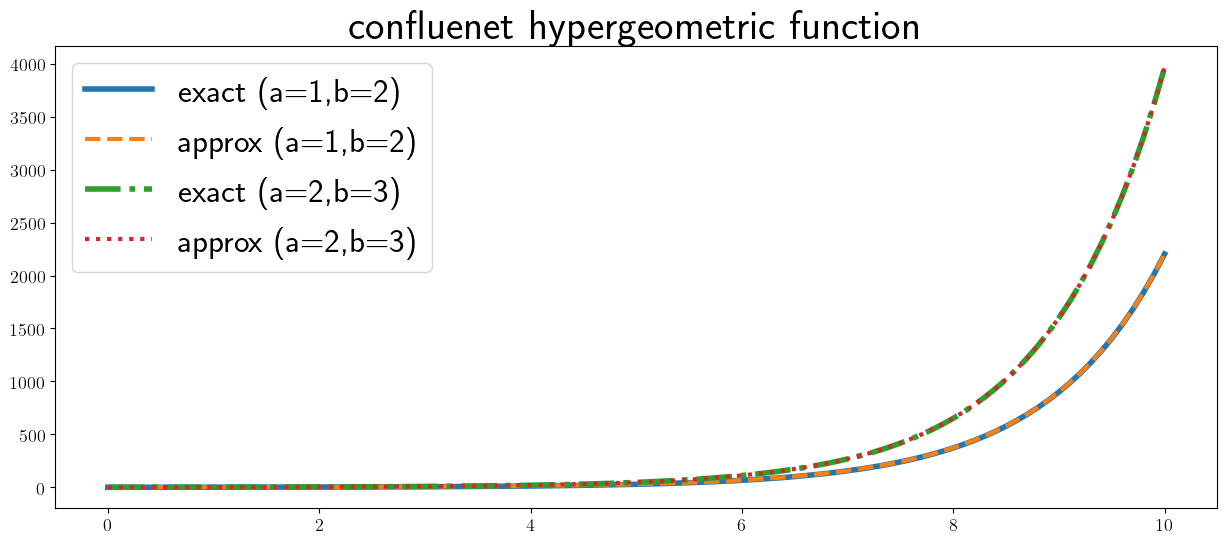

In [5]:
def h1f1(x,a,b,n=1):
    sumi,t=1,1
    while(abs(t)>1e-12):
        t,sumi,n,a,b=t*(a/b)*(x/n),sumi+t,n+1,a+1,b+1
    return sumi

a1,b1=1,2
a2,b2=2,3
X=[ i/10 for i in range (0,101) ]
y1=[ h1f1(x,a1,b1) for x in X ]
y2=[ h1f1(x,a2,b2) for x in X ]

plt.plot( X, sc.hyp1f1(a1,b1, X),'-',linewidth=4 , 
             label='exact (a={},b={})'.format(a1,b1))
plt.plot( X, y1, '--', linewidth=3, 
             label = 'approx (a={},b={})'.format(a1,b1))

plt.plot( X, sc.hyp1f1(a2,b2, X),'-.',linewidth=4 , 
             label='exact (a={},b={})'.format(a2,b2))
plt.plot( X, y2, ':', linewidth=3, 
             label = 'approx (a={},b={})'.format(a2,b2))
plt.title('confluenet hypergeometric function ', fontsize=30)
plt.legend(fontsize=24)
plt.show()

$ \text{ Q5. Write a function which returns the mean, median and mode of an array. } $               
$ \quad \ \ \ \text{  You may use python ufunc and methods like sort(), count() etc.} $ 

$\quad \text{Mean} : \displaystyle{{\bar{x}}=\frac{x_1 + x_2 + ... + x_n}{n}=\sum_{i=1}^n \frac{x_i}{n}} $

$\quad \text{Median = Size of } \frac{(n+1)}{2}\text{th } \text{item for odd term of n and} $

$ \quad \text{Median = average of }\frac{n}{2}\text{th }  \& \frac{(n+2)}{2}\text{th } \text{item for even term of n.} $

$\quad \text{Mode is that value in a series of observation which occurs with greatest frequency.}$

In [6]:
def mmm(n_num):
    n = len(n_num)
    n_num.sort()
    #mean
    m1= str(sum(n_num) / n)
    #median
    if n % 2 == 0:
        median = (n_num[n//2] + n_num[n//2 - 1])/2
    else:
        median = n_num[n//2]
    m2= str(median)
    #mode
    L1=[]
    i = 0
    while i < len(n_num) :
        L1.append(n_num.count(n_num[i]))
        i += 1
    d1 = dict(zip(n_num, L1))
    d2=[k for (k,v) in d1.items() if v == max(L1)]
    m3=str(d2[0])
    return m1,m2,m3

s=[1, 2, 3, 2, 4, 2, 4, 8, 5, 7, 6]
print('Mean \t:',mmm(s)[0],'\nMedian \t:',mmm(s)[1],'\nMode \t:',mmm(s)[2])

Mean 	: 4.0 
Median 	: 4 
Mode 	: 2


# $${\textbf{Assignment 2}}$$

$\text{ Q1. Reverse the order of a given array :} $                                                 
$\qquad\qquad [16,7,5, 28]\text{ becomes }[28,5,7,16]$

In [7]:
A=np.array([16,7,5,28])

print('Original Array: ', str(A),
      '\t-> Reversed Array: ', str(np.flip(A))) 

Original Array:  [16  7  5 28] 	-> Reversed Array:  [28  5  7 16]


$\text{Q2. Write a NumPy program to create a 2d array with 1 on the border and 0 inside.}$

In [8]:
def A2D(l):
    border_array = np.ones((l,l))
    border_array[1:-1, 1:-1] = 0
    print(border_array)
    
A2D(5)

[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


$\text{ Q3. Consider the following data of new covid-19 infection in a country}$

|day          |   0  |   1  |   2  |   3  |   4  |   5  |   6  |   7  |   8  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|Infection(N) |  122 |  160 |  170 |  250 |  255 |  290 |  331 |  350 |  380 |

$ \qquad\text{Plot }: $                                                                            
$ \qquad \qquad \ \ i) \text{ infection vs day curve}  $                                                
$ \qquad \qquad \ ii) \text{ cumulative infection vs day (use ‘cumsum’) } $                            
$ \qquad\qquad iii) \text{ use infection vs day in a three day rolling average} $                  
$ \qquad\qquad iv) \ \ \frac{dN}{N} \text{ vs day} $

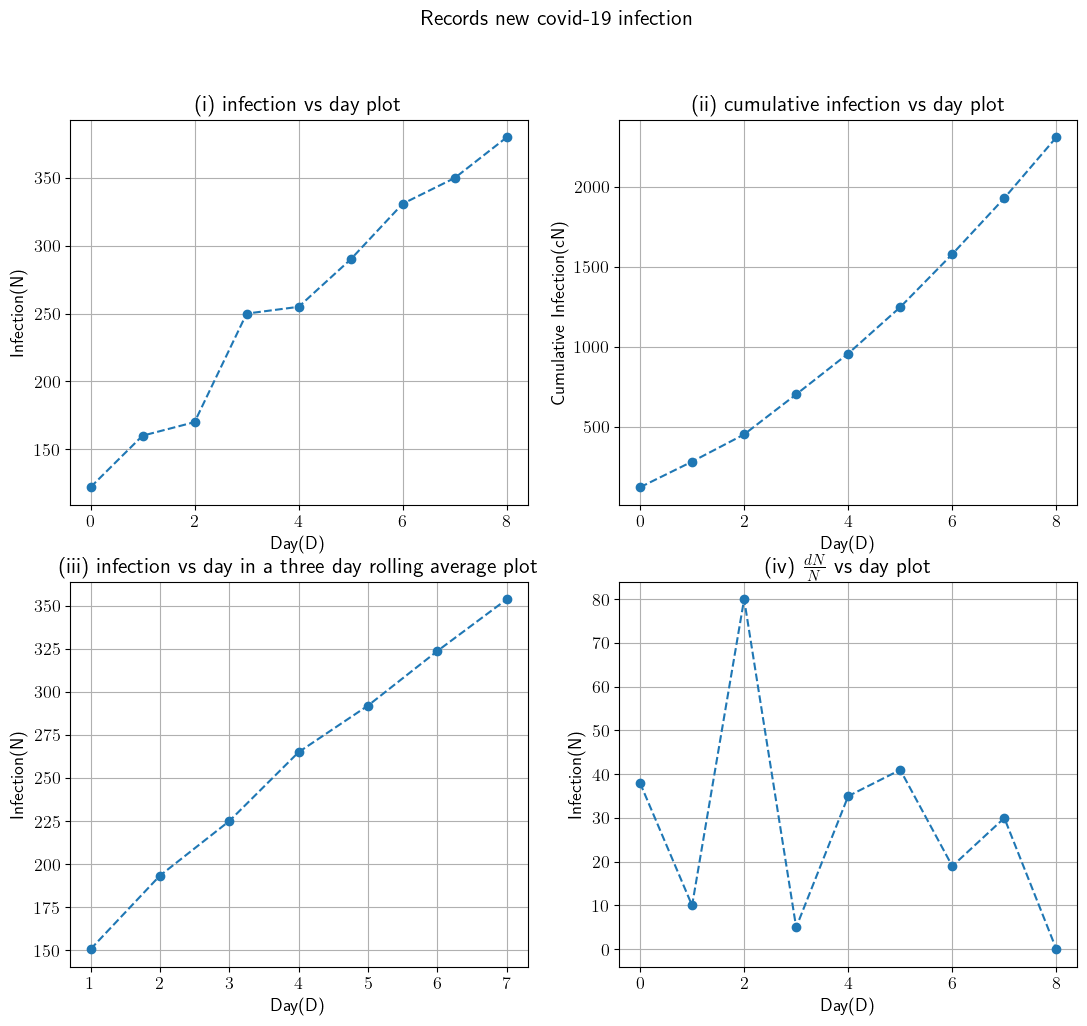

In [9]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(13,11))  

day=np.array([0,1,2,3,4,5,6,7,8])
N=np.array([122,160,170,250,255,290,331,350,380])
ax1.plot(day,N,linestyle='--',marker='o')
ax1.set_xlabel('Day(D)')
ax1.set_ylabel('Infection(N)')
ax1.set_title('(i) infection vs day  plot')
ax1.grid(True)

cN=np.cumsum(N)
ax2.plot(day,cN,linestyle='--',marker='o')
ax2.set_xlabel('Day(D)')
ax2.set_ylabel('Cumulative Infection(cN)')
ax2.set_title('(ii) cumulative infection vs day  plot')
ax2.grid(True)

def moving_average(a, n) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

y=moving_average(N,3)
x=moving_average(day,3)
ax3.plot(x,y,linestyle='--',marker='o')
ax3.set_xlabel('Day(D)')
ax3.set_ylabel('Infection(N)')
ax3.set_title('(iii) infection vs day in a three day rolling average plot')
ax3.grid(True)

s=np.diff(N)
s=np.append(s,0)
ax4.plot(day,s,linestyle='--',marker='o')
ax4.set_xlabel('Day(D)')
ax4.set_ylabel('Infection(N)')
ax4.set_title(r'(iv) $\frac{dN}{N}$ vs day  plot')
ax4.grid(True)

fig.suptitle('Records new covid-19 infection')
plt.show()

$\text{ Q4. Write a NumPy program to append values to the end of an array.} $                      
$\qquad\text{Expected Output: } $                                                                     
$\qquad\qquad\qquad \text{  Original array: } [10, 20, 30] $                                             
$ \qquad\qquad\qquad \text{  After append values to the end of the array: }[10, 20, 30, 40, 50, 60, 70, 80, 90]$

In [10]:
A=np.array([10,20,30])
np.append(A,[i for i in range(40,100,10)])

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

$\text{ Q5. Take a 2-D numpy array of }3\times3 \text{ elements. } $                                 
$\quad \ \text{   i) Write a one liner code to swap the last row with the first.}$                       
$\quad\text{  ii) Write a one liner code to swap the last column with the first. }$

In [11]:
a = np.array([[ 4, 3, 1],
              [ 5, 7, 0], 
              [ 9, 9, 3]])

m,n=a.shape

b=a.copy()
print('row-swapped array :')
b[[m-1,0 ],: ] = b[[0, m-1],: ]  # (i)
print(b)

print('column-swapped array :')
a[:,[0, n-1] ] = a[:,[n-1, 0]]   # (ii)
print(a)

row-swapped array :
[[9 9 3]
 [5 7 0]
 [4 3 1]]
column-swapped array :
[[1 3 4]
 [0 7 5]
 [3 9 9]]


# $${\textbf{Assignment 3}}$$

$\text{ Q1. Run the following code: } $                                                                
  `import numpy as np`                                                                                
  `X=10+30*np.random.rand(1000)`                                                                    
  `Y=X**2+2 `
    
$\text{ Q2. Repeat Q1  after running the following code}  $                                           
`import numpy as np`                                                                                     
`X=10+30*np.random.rand(1000)`                                                                      
`Y=np.exp(-3/X)`
      
$\text{ Find the histogram of the array Y.}$                                                        
$\text{ Find mean, median from the above histogram.} $                                                 
$\text{ Compare them with direct statistics calculation.} $                                        
$\qquad\qquad\text{Error} = \displaystyle \frac{(\text{Expected value} − \text{Actual value})}{\text{ Actual value}} $       

$\qquad\qquad\text{Percentage error} = \displaystyle \frac{(\text{Expected value} − \text{Actual value})}{\text{ Actual value}} \times 100 $

In [12]:
plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True

In [13]:
def Histogram(y,n):
    mx,mi=max(y),min(y)
    mx=mx+mx*0.00001
    h=(mx-mi)/n
    p=[(mi+i*h) for i in range(n+1)]
    pr=[0 for i in range(n)]
    fig = plt.figure()
    a = fig.add_subplot(111)
    ax = gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    for i in y:
        k=int((i-mi)/h)
        pr[k]+=1  
    ax.bar([(i) for i in range(n)], pr)
    ax.set_title('For N = {} '.format(n))
    for xi,yi in zip([(i) for i in range(n)],pr):
        label = "{:.0f}".format(yi)
        ax.annotate(label,(xi,yi),
                    textcoords="offset points",
                    xytext=(0,10),ha='center')
    #plt.savefig('images/y,h={},n={}.jpg'.format(h,n),dpi=200)
    plt.show()
    r=list(zip(p,p[1:]))
    mn=sum([pr[i]*(r[i][0]+r[i][1])/2 for i in range(len(pr))])/sum(pr)
    print('calculated mean : {:.2f}'.format(mn), 
          '\t actual mean : {:.2f} '.format(np.mean(y)))
    c,l,rp=0,0,sum(pr)/2
    while c<rp:
        if c+pr[l]>rp:
            break
        c+=pr[l]
        l+=1
    mdn=r[l][0]+((rp-c)*h)/pr[l]
    print('calculated median : {:.2f}'.format(mdn),
          '\t actual median : {:.2f}'.format(np.median(y)))
    return None

In [14]:
x = 10 + 30*np.random.rand(1000)

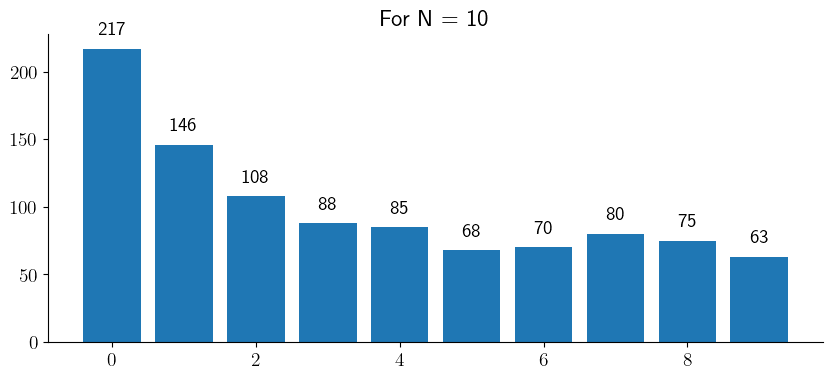

calculated mean : 694.83 	 actual mean : 692.46 
calculated median : 601.54 	 actual median : 596.50


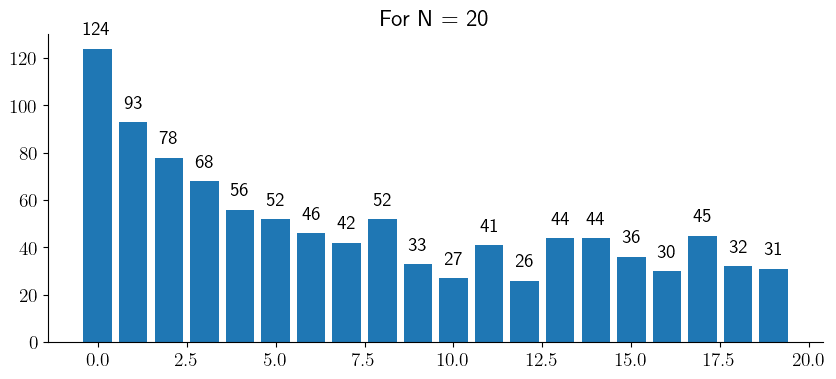

calculated mean : 693.70 	 actual mean : 692.46 
calculated median : 599.39 	 actual median : 596.50


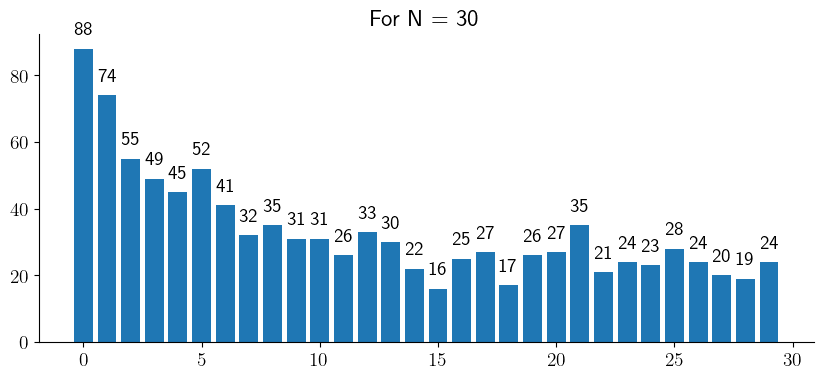

calculated mean : 692.98 	 actual mean : 692.46 
calculated median : 598.89 	 actual median : 596.50


In [15]:
y = x**2+2         # Q1
N = [10, 20, 30]
for n in N:
    Histogram(y,n)

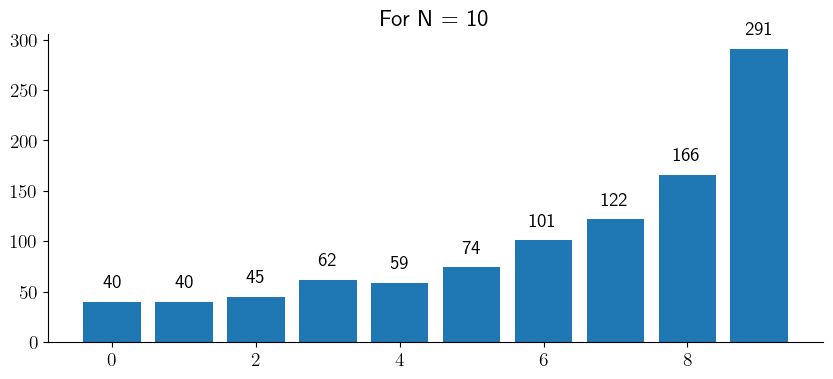

calculated mean : 0.87 	 actual mean : 0.87 
calculated median : 0.88 	 actual median : 0.88


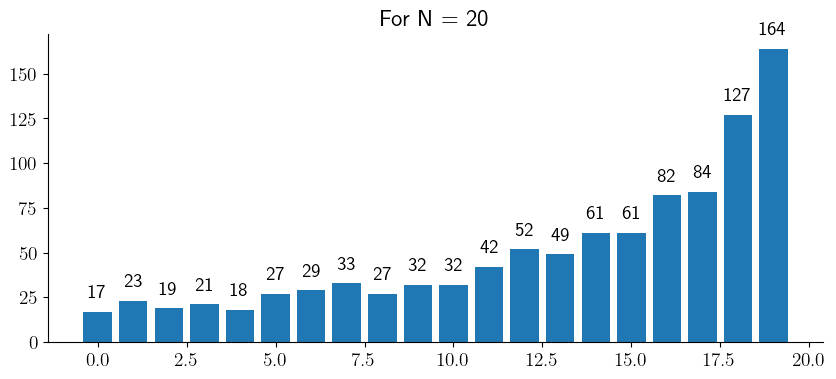

calculated mean : 0.87 	 actual mean : 0.87 
calculated median : 0.88 	 actual median : 0.88


In [16]:
y = np.exp(-3/x)  # Q2
N = [10, 20]
for n in N:
    Histogram(y,n)

$\text{Q3. Read the data h.txt uploaded in the class room.}$                                          
$ \ \quad\text{ Find the histogram with 10 and 20 bins. }$                                              
$ \ \quad\text{ Find also mean, median from the above histogram.}$                                          
$ \ \quad\text{ Compare them with direct statistics calculation.}$

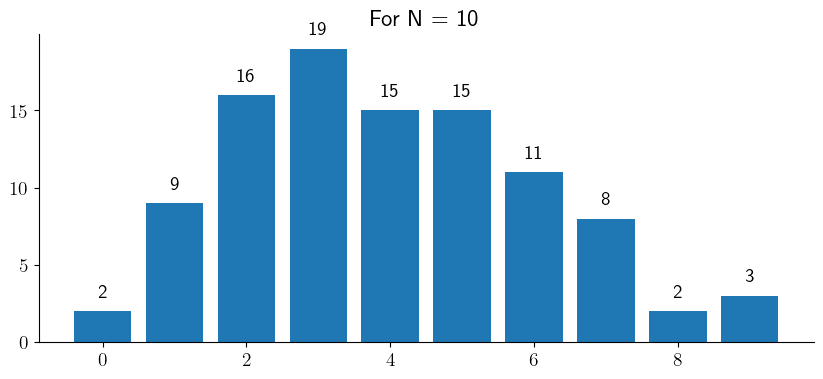

calculated mean : 5.24 	 actual mean : 5.26 
calculated median : 5.16 	 actual median : 5.18


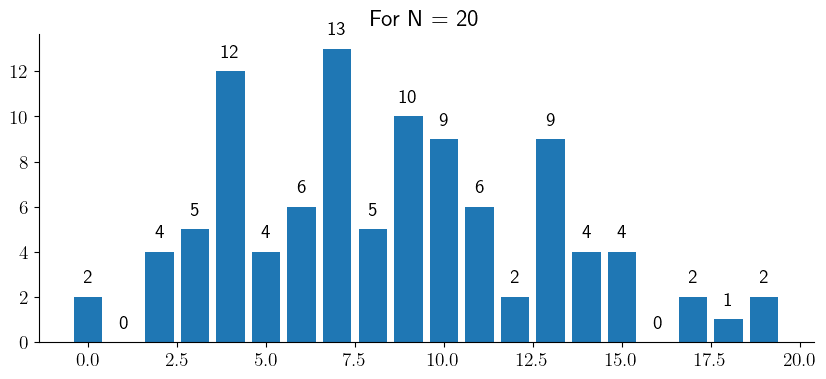

calculated mean : 5.25 	 actual mean : 5.26 
calculated median : 5.21 	 actual median : 5.18


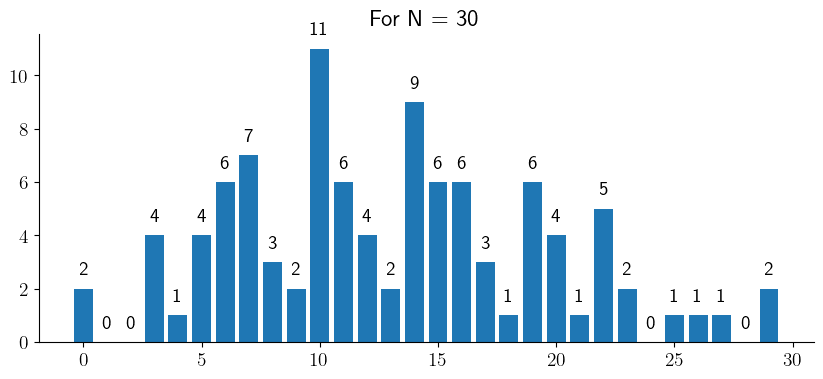

calculated mean : 5.25 	 actual mean : 5.26 
calculated median : 5.19 	 actual median : 5.18


In [17]:
y = np.loadtxt('h.txt')
N = [10, 20, 30]
for n in N:
    Histogram(y,n)

# $${\textbf{Assignment 4}}$$

### Q1. Use d1.txt to fit with the function $\displaystyle{ y = mx + c }$

#### $$\displaystyle{m = \frac{N\sum x_i y_i - \sum x_i \sum y_i}{N\sum x_i^2 - (\sum x_i)^2} \qquad c = \frac{\sum y_i \sum x_i^2 - \sum x_i \sum x_i y_i}{N\sum x_i^2 - (\sum x_i)^2} }$$

In [18]:
def fit(x,y):
    n = len(x)
    sx = sum(x)
    sy = sum(y)
    sx2 = sum(x**2)
    sxy = sum(x*y)
    b = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy) / b
    c = (sy*sx2 - sx*sxy) / b
    return m,c

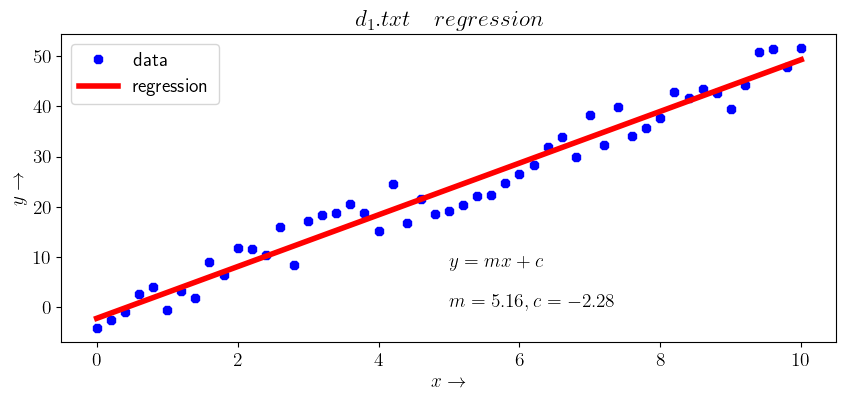

In [19]:
A1=np.loadtxt('d1.txt')
x=A1[:,0]
y=A1[:,1]
plt.plot(x,y,'b8',label='data')

m,c=fit(x,y)
Y=m*x+c
plt.plot(x,Y, 'r',linewidth=4,label='regression')
plt.xlabel(r'$ x \rightarrow $')
plt.ylabel(r'$ y \rightarrow $')
plt.title(r'$d_1.txt \quad regression $')
plt.text(5,8,r'$y=mx+c$')
plt.text(5,0,r'$m={:.2f},c={:.2f}$'.format(m,c))
plt.legend()
plt.show()

### 2. Use d2.txt to fit with the function $ \displaystyle{y = mx^2 + c}$
 $\displaystyle{ \text{ on comparing with }, Y = mX + c \qquad\text{we get  },\quad X={x^2}}$

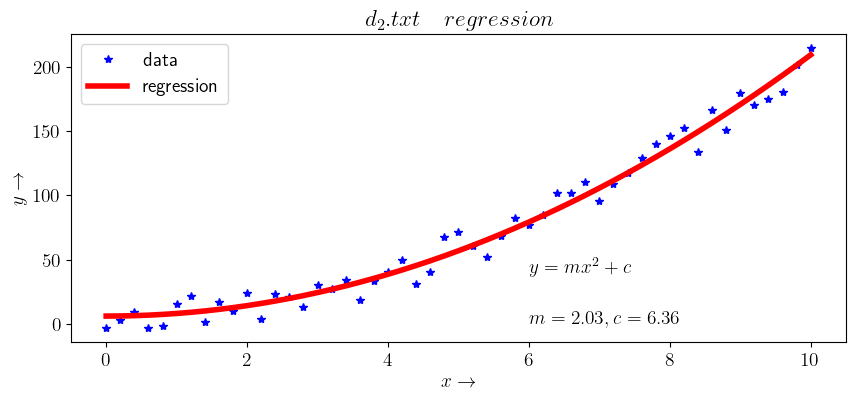

In [20]:
A2=np.loadtxt('d2.txt')
x=A2[:,0]
y=A2[:,1]
plt.plot(x,y, 'b*',label='data')

X=x**2
m,c=fit(X,y)
Y=m*X+c
plt.plot(x,Y, 'r',linewidth=4,label='regression')
plt.xlabel(r'$ x \rightarrow $')
plt.ylabel(r'$ y \rightarrow $')
plt.title(r'$d_2.txt \quad regression $')
plt.text(6,40,r'$y=mx^2+c$')
plt.text(6,0,r'$m={:.2f},c={:.2f}$'.format(m,c))
plt.legend()
plt.show()

### 3. Use d3.txt to fit with the function $ \displaystyle{y = \frac{a}{x^2} + b}$
$\displaystyle{\text{ on comparing with },  Y = Xm + c } $                                       
$\displaystyle{\quad\text{we get  },\quad X=\frac{1}{x^2}, \qquad c=b, \qquad m=a}$

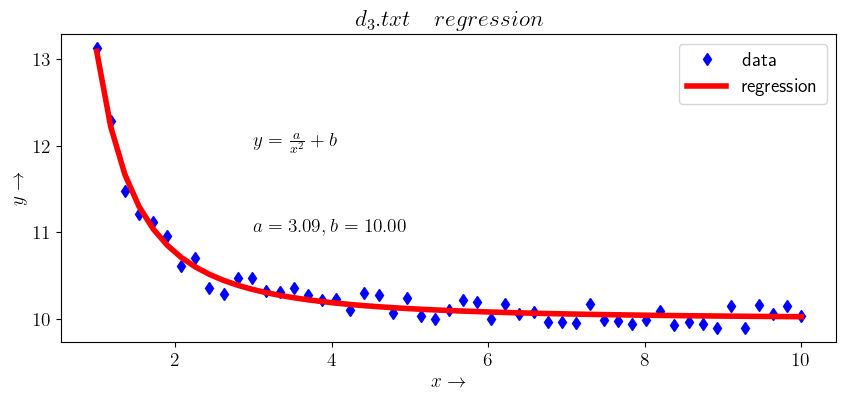

In [21]:
A3=np.loadtxt('d3.txt')
x=A3[:,0]
y=A3[:,1]
plt.plot(x,y, 'bd',label='data')

X=1/(x**2)
m,c=fit(X,y)
Y=(m*X)+c
plt.plot(x,Y, 'r',linewidth=4,label='regression')
plt.xlabel(r'$ x \rightarrow $')
plt.ylabel(r'$ y \rightarrow $')
plt.title(r'$d_3.txt \quad regression $')
plt.text(3,12,r'$y=\frac{a}{x^2}+b$')
plt.text(3,11,r'$a={:.2f},b={:.2f}$'.format(m,c))
plt.legend()
plt.show()

### 4. Use d4.txt to fit with the function $\displaystyle{y = a \exp\bigg(-\frac{x}{x_o}\bigg)} $
 $\text{Taking log on both sides, we get :- } $
 
 $\displaystyle{ \qquad \log y = -\frac{x}{x_o} + \log a} $
 
 $ \text{on comparing with },  Y = xm + c $

$\displaystyle{\text{we get}, \quad Y=\log y} ,$

$ \qquad\qquad\displaystyle{ m=-\frac{1}{x_o}=>x_o=-\frac{1}{m}},$

$ \ \qquad\qquad\displaystyle{ c=\log a =>  a=\exp(c)}$

$\text{The expression thus becomes }$

## $\qquad\qquad\qquad \displaystyle{\boxed{  Y = \exp(x*m)*\exp(c) }}$

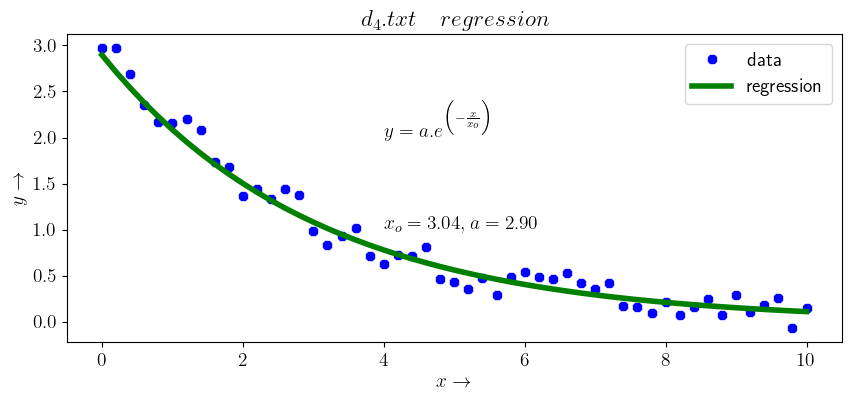

In [22]:
A4=np.loadtxt('d4.txt')
x=A4[:,0]
y=A4[:,1]
plt.plot(x,y, 'b8',label='data')

B=np.array([i for i in A4 if i[0]>0 and i[1]>0])
m,c=fit(B[:,0],np.log(B[:,1]))
Y=np.exp(c)*np.exp(x*m)
plt.plot(x,Y,'g',linewidth=4,label='regression')
plt.xlabel(r'$ x \rightarrow $')
plt.ylabel(r'$ y \rightarrow $')
plt.title(r'$d_4.txt \quad regression $')
plt.text(4,2,r'$y=a.e^{\bigg(-\frac{x}{x_o}\bigg)}$')
plt.text(4,1,r'$x_o={:.2f},a={:.2f}$'.format((-1/m),np.exp(c)))
plt.legend()
plt.show()

### 5. Use d5.txt to fit with the function $\displaystyle{y = ax^k}$

$  \text{Taking log on both sides, we get :- } $

$\displaystyle{\qquad \log y =  k\log x + \log a => Y = mX + c } $

$\displaystyle{\text{where} \qquad Y = \log y ,\qquad m=k ,\qquad X = \log x ,\qquad c = \log a=>a=\exp(c)} $

$\text{The expression thus becomes }$

## $\qquad\qquad\qquad\qquad\displaystyle{\boxed{ Y = X^m\exp(c)}}$

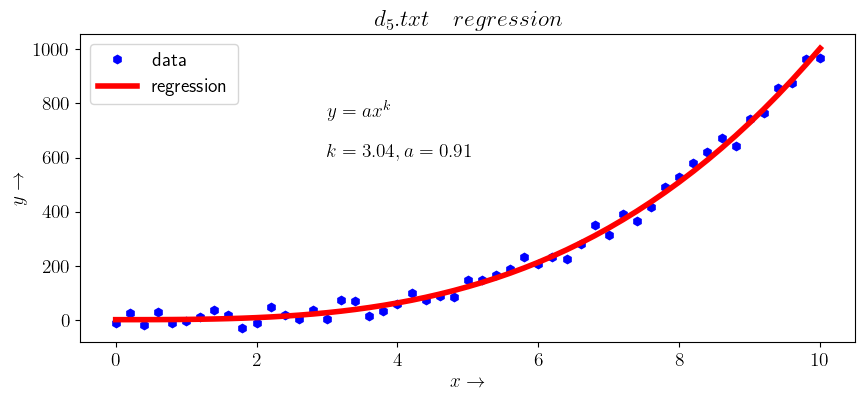

In [23]:
A5=np.loadtxt('d5.txt')
x=A5[:,0]
y=A5[:,1]
plt.plot(x,y, 'bh',label='data')

m,c=fit(np.log(A5[16:,0]),np.log(A5[16:,1]))
Y=np.exp(c)*(x**m)
plt.plot(x,Y, 'r',linewidth=4,label='regression')
plt.xlabel(r'$x \rightarrow $')
plt.ylabel(r'$y \rightarrow $')
plt.title(r'$d_5.txt \quad regression $')
plt.text(3,750,r'$y=ax^k $')
plt.text(3,600,r'$k={:.2f},a={:.2f}$'.format(m,np.exp(c)))
plt.legend()
plt.show()

-----------------------------------------------------------------------------------------------------------------------------